In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Times New Roman'})

df = pd.read_csv('data/Conjunto de datos - Copia de Datasets (1).csv')

In [2]:
df

,Dataset,Tipo,Conjunto,Neutral,Anger,Disgust,Fear,Happiness,Sadness,Surprise,Total,CNN,Total CNN,RNN,Total RNN
0,AffWild2,Video,Entrenamiento,177720,16573,10771,9080,95817,79853,31615,421429,1,421429,1,421429
1,AffWild2,Video,Validación,82258,6126,5296,8408,34511,25157,12332,174088,1,174088,1,174088
2,ExpW,Imágenes,Entrenamiento,21157,3058,2831,856,13810,7767,5481,54960,1,54960,0,0
3,IFEED,Imágenes,Entrenamiento,8143,5144,412,2009,10162,8242,802,34914,1,34914,0,0
4,DFEW,Video,Entrenamiento,213674,161398,9055,57930,182747,182021,94878,901703,1,901703,0,0


In [3]:
df_cnn = df[df['CNN'] == 1]
df_rnn = df[df['RNN'] == 1]

In [4]:
colors_second_option = ['#c5d86d', '#81CBDA', '#fed0bb', '#fcb9b2', '#b23a48', '#8c2f39', '#461220']

colors = ['#264653', '#287271', '#2A9D8F', '#8AB17D', '#E9C46A', '#F4A261', '#E76F51']

/tmp/ipykernel_106379/3647954649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rnn['bar_label'] = df_rnn['Conjunto']  + '\n' + df_rnn['Dataset']


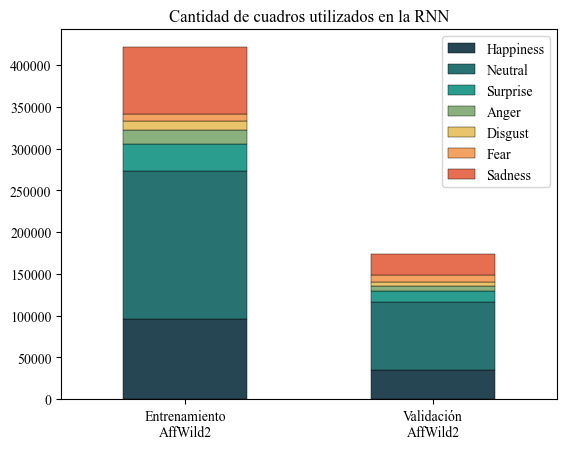

In [5]:
df_rnn['bar_label'] = df_rnn['Conjunto']  + '\n' + df_rnn['Dataset']
data = df_rnn[['bar_label', 'Happiness', 'Neutral', 'Surprise', 'Anger', 'Disgust', 'Fear', 'Sadness']]
ax = data.plot(kind='bar', stacked=True, color=colors, edgecolor='black', linewidth=0.3)

ax.set_xticklabels(df_rnn['bar_label'])
title = "Cantidad de cuadros utilizados en la RNN"
plt.title(title)
plt.xticks(rotation=0)

plt.savefig(f'data/{title}.png')
plt.show()

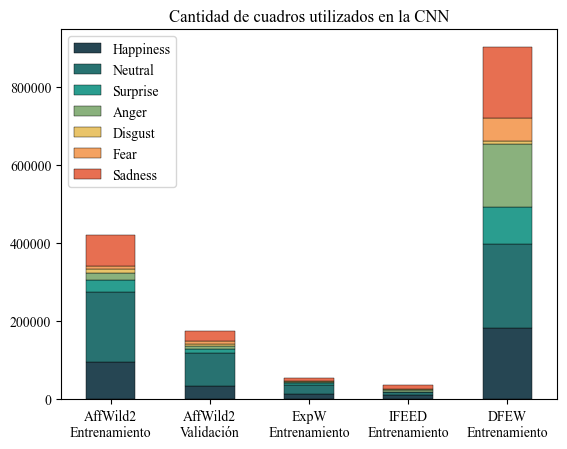

In [6]:
df_cnn['bar_label'] = df_cnn['Dataset'] + '\n' + df_cnn['Conjunto']
data = df_cnn[['bar_label', 'Happiness', 'Neutral', 'Surprise', 'Anger', 'Disgust', 'Fear', 'Sadness']]
ax = data.plot(kind='bar', stacked=True, color=colors, edgecolor='black', linewidth=0.3)

ax.set_xticklabels(df_cnn['bar_label'], fontsize=10)
title = "Cantidad de cuadros utilizados en la CNN"
plt.title(title)
plt.xticks(rotation=0)

plt.savefig(f'data/{title}.png')
plt.show()

In [10]:
total_sum = df[['Happiness', 'Neutral', 'Surprise', 'Anger', 'Disgust', 'Fear', 'Sadness']].sum()

color_dict = {
    'Happiness': '#264653',
    'Neutral': '#287271',
    'Surprise': '#2A9D8F',
    'Anger': '#8AB17D',
    'Disgust': '#E9C46A',
    'Fear': '#F4A261',
    'Sadness': '#E76F51'
}

/tmp/ipykernel_22230/2793704192.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{percentage.sort_values(ascending=False)[i]:.2f}%', ha='center', va='bottom', fontsize=8)


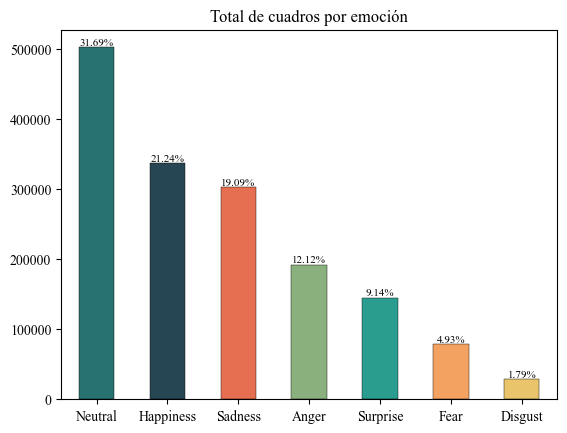

In [13]:
bar_colors = [color_dict[col] for col in total_sum.sort_values(ascending=False).index]

ax = total_sum.sort_values(ascending=False).plot(kind='bar', color=bar_colors, edgecolor='black', linewidth=0.3)
plt.xticks(rotation=0)
title = "Total de cuadros por emoción"
plt.title(title)

percentage = total_sum/total_sum.sum() * 100
for i, v in enumerate(total_sum.sort_values(ascending=False)):
    ax.text(i, v + 1, f'{percentage.sort_values(ascending=False)[i]:.2f}%', ha='center', va='bottom', fontsize=8)

plt.savefig(f'data/{title}.png')